In [1]:
"""
Purpose: To demonstrate how to access the computed features of a neuron
at different resolutions
"""

'\nPurpose: To demonstrate how to access the computed features of a neuron\nat different resolutions\n'

In [2]:
%load_ext autoreload 
%autoreload 2

In [3]:
import neurd

/usr/local/lib/python3.8/dist-packages/python_jsonschema_objects/__init__.py:113: UserWarning: Schema id not specified. Defaulting to 'self'
  warnings.warn("Schema id not specified. Defaulting to 'self'")


# Loading a neuron object

In [4]:
from neurd import neuron_utils as nru

In [5]:
mesh_path = "../Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946.off"
obj_autoproof_path = "../Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946_auto_proof.pbz2"
obj_path = "../Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946.pbz2"

n_exc_single = nru.decompress_neuron(
    filepath=obj_autoproof_path,
    original_mesh=mesh_path
)

mesh_path = "../Auto_Proof_Pipeline/Double_Soma/864691135510518224.off"
obj_autoproof_path = "../Auto_Proof_Pipeline/Double_Soma/864691135510518224_auto_proof.pbz2"
obj_path = "../Auto_Proof_Pipeline/Double_Soma/864691135510518224.pbz2"


n_inh_split = nru.decompress_neuron(
    filepath=obj_autoproof_path,
    original_mesh=mesh_path
)

Decompressing Neuron in minimal output mode...please wait
Decompressing Neuron in minimal output mode...please wait


# Getting Neuron Objects

In [6]:
neuron_obj = n_inh_split

In [7]:
[k for k in dir(neuron_obj.pipeline_products.auto_proof) if "apical" in k]

['apical_bbox_volume',
 'apical_bbox_x_max',
 'apical_bbox_x_max_soma_relative',
 'apical_bbox_x_min',
 'apical_bbox_x_min_soma_relative',
 'apical_bbox_y_max',
 'apical_bbox_y_max_soma_relative',
 'apical_bbox_y_min',
 'apical_bbox_y_min_soma_relative',
 'apical_bbox_z_max',
 'apical_bbox_z_max_soma_relative',
 'apical_bbox_z_min',
 'apical_bbox_z_min_soma_relative',
 'apical_branch_length_mean',
 'apical_branch_length_median',
 'apical_n_limbs',
 'apical_n_long_branches',
 'apical_n_medium_branches',
 'apical_n_short_branches',
 'apical_soma_angle_max',
 'apical_soma_angle_min',
 'n_syn_apical',
 'n_syn_apical_head_postsyn',
 'n_syn_apical_neck_postsyn',
 'n_syn_apical_no_head_postsyn',
 'n_syn_apical_shaft',
 'n_syn_apical_shaft_head_postsyn',
 'n_syn_apical_shaft_neck_postsyn',
 'n_syn_apical_shaft_no_head_postsyn',
 'n_syn_apical_shaft_postsyn',
 'n_syn_apical_shaft_shaft_postsyn',
 'n_syn_apical_total',
 'n_syn_apical_total_head_postsyn',
 'n_syn_apical_total_head_presyn',
 'n_sy

# Neuron Attributes: Pipeline Products

In [8]:
neuron_obj.pipeline_products.stages

['decimation',
 'soma_identification',
 'decomposition',
 'multi_soma_split_suggestions',
 'multi_soma_split_execution',
 'cell_type_ax_dendr',
 'auto_proof']

In [9]:
stage = "auto_proof"
[k for k in dir(getattr(
    neuron_obj.pipeline_products,stage))]

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'apical_bbox_volume',
 'apical_bbox_x_max',
 'apical_bbox_x_max_soma_relative',
 'apical_bbox_x_min',
 'apical_bbox_x_min_soma_relative',
 'apical_bbox_y_max',
 'apical_bbox_y_max_soma_relative',
 'apical_bbox_y_min',
 'apical_bbox_y_min_soma_relative',
 'apical_bbox_z_max',
 'apical_bbox_z_max_soma_relative',
 'apical_bbox_z_min',
 'apical_bbox_z_min_soma_relative',
 'apical_branch_length_mean',
 'apical_branch_length_median',
 'apical_n_limbs',
 'apical_n_long_branches',
 'apical_n_medium_branches',
 'apical_n_short_branches',
 'apical_soma_angle_max',
 'apic

### Useful Neuron Attributes: Precomputed Graph

In [10]:
""" 
pipeline_products

--- soma_identification ----
nuclei_meshes
glia_meshes

--- decomposition ----
bbox_[x/y/z]_[min/max](_soma_relative)
branch_length_[mean/median]
n_limbs
n_multi_soma_touching_limbs
n_same_soma_multi_touching_limbs
n_somas
n_spines
skeletal_length
spine_volume_[density/median]
total_spine_volume
width(_no_spine)_[90_perc/median]

--- multi_soma_split_suggestions ---
red_blue_split_points_by_limb
n_paths_cut


# --- cell_type_ax_dendr ---
axon_[mesh/skeleton/limb_branch_dict]
dendrite_[mesh/skeleton/limb_branch_dict]

baylor_cell_type
baylor_cell_type_exc_probability

n_nuclei_in_radius
centroid_[x/y/z](_nm)
[axon/dendrite]_angle_[max/min]
[axon/dendrite]_bbox_[x/y/z]_[min/max](_soma_relative)
[axon/dendrite]_skeleton
n_syn_axon_[ais/bouton/non_bouton]_[presyn/postsyn]

neuron_graph_axon_labeled
neuron_graph_high_fid_axon

spine_density
spine_volume_density
syn_density_[head/neck/shaft/no_head]


--- auto proofreading
# --- neuron_obj.pipeline_products.auto_proof.neuron_graph_after_proof
[compartment]_[mesh/skeleton/limb_branch_dict]
[compartment]_soma_angle_[max/min]
[compartment]_bbox_[x/y/z]_[min/max](_soma_relative)
[compartment]_n_limbs
[compartment]_branch_length_[mean/median]
n_syn_[compartment](_[head/neck/shaft/no_head)(_[postsyn/presyn])
n_boutons
spine(_volume)_density
syn_density_[head/neck/shaft/no_head]_after_proof
spine_density
spine_volume_density


[error_filter]_error_[length/area]
split_locations_before_filter # dict: error_filter > limb > locations

neuron_graph_after_proof
"""
print('')

In [11]:
# Accessing pipeline products
neuron_obj.syn_density_head_after_proof

0.37127970644641306

In [12]:
# Could be explicit with long path but don't have to
neuron_obj.pipeline_products.cell_type_ax_dendr.axon_skeleton

array([[[1430163.        ,  633318.        , 1114281.        ],
        [1430219.63495774,  633240.18511971, 1114253.84625314]],

       [[1430219.63495774,  633240.18511971, 1114253.84625314],
        [1430300.09656116,  633199.37674393, 1114221.26708781]],

       [[1430300.09656116,  633199.37674393, 1114221.26708781],
        [1430390.24092798,  633173.60721298, 1114186.48312018]],

       ...,

       [[1521151.60746294,  561572.57032263, 1027948.59722616],
        [1521208.85462696,  561651.75378932, 1027927.31951918]],

       [[1521208.85462696,  561651.75378932, 1027927.31951918],
        [1521239.15848797,  561737.7600367 , 1027927.3132188 ]],

       [[1521239.15848797,  561737.7600367 , 1027927.3132188 ],
        [1521233.        ,  561824.8       , 1027954.        ]]])

# Neuron Attributes

In [13]:
dir(neuron_obj)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_index',
 '_mesh_kdtree',
 'align_matrix',
 'apical_limb_branch_dict',
 'apical_shaft_limb_branch_dict',
 'apical_tuft_limb_branch_dict',
 'area',
 'area_with_somas',
 'axon_area',
 'axon_classification',
 'axon_length',
 'axon_limb',
 'axon_limb_branch_dict',
 'axon_limb_idx',
 'axon_limb_name',
 'axon_mesh',
 'axon_on_dendrite_limb_branch_dict',
 'axon_skeleton',
 'axon_starting_branch',
 'axon_starting_coordinate',
 'basal_limb_branch_dict',
 'boutons',
 'boutons_volume',
 'calculate_decomposition_products',
 'calculate_multi_soma_sp

In [14]:
neuron_attributes = [
    "limb_mesh_volume", #calculated from limbs
    "mesh_volume_with_somas",
    "axon_starting_coordinate",
    "same_soma_multi_touching_limbs",
    "multi_soma_touching_limbs",
    "n_limbs",
    "n_somas",
    "n_branches_per_limb",
    "n_branches",

    # --- spine attributes
    "spines",
    "synapses",
]

## Neuron attributes: accessing examples

In [15]:
neuron_obj.n_limbs

5

In [16]:
neuron_obj.get_soma_meshes()

[<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>]

## Neuron Attributes: Visualizing

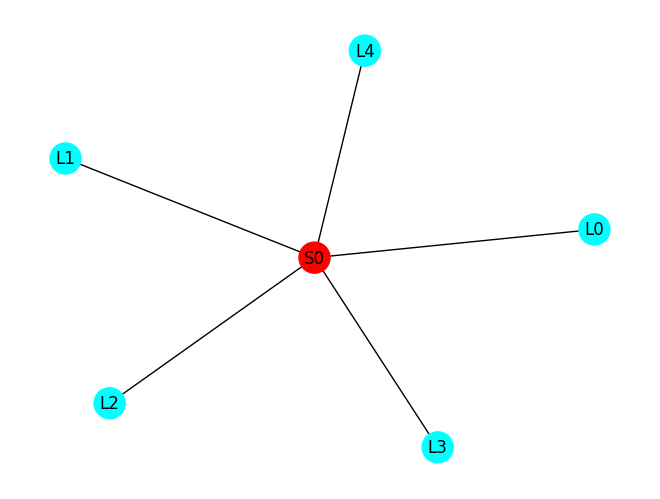

In [17]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(neuron_obj)


 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

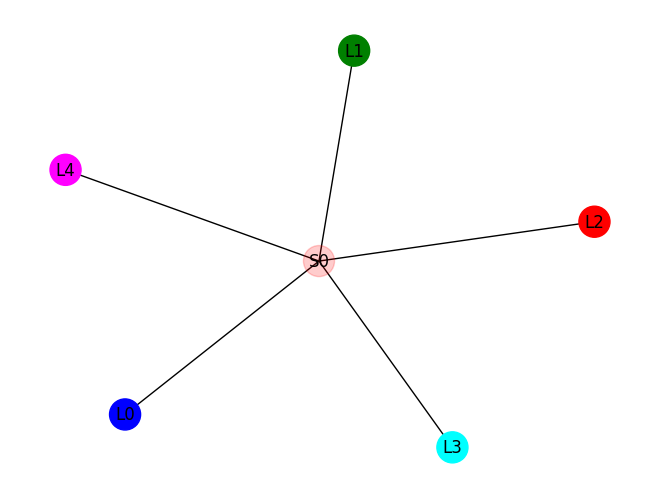

In [18]:
nviz.visualize_neuron_limbs(neuron_obj)

In [19]:
nviz.plot_spines_head_neck(neuron_obj)


 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [20]:
nviz.plot_synapses(neuron_obj)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Soma Attributes

In [21]:
"""
Can access soma objects using dictionary like indexing 
(set up for multiple possible somas in one neuron object)
"""
soma_obj = neuron_obj["S0"]
soma_obj

In [22]:
[k for k in dir(soma_obj) if k[0] != "_"]

['area',
 'compartment',
 'mesh',
 'mesh_center',
 'mesh_face_idx',
 'mesh_volume',
 'n_synapses',
 'n_synapses_post',
 'n_synapses_pre',
 'sdf',
 'side_length_ratios',
 'synapses',
 'synapses_post',
 'synapses_pre',
 'volume',
 'volume_ratio']

# Limb Attributes

In [23]:
"""
Can access the limbs of a neuron with list or dictionary like indexing

#list like indexing
limb_obj = neuron_obj[0]

#dictionary like indexing
limb_obj = neuron_obj["L0"]

"""
# accessing the first limb
limb_obj = neuron_obj[0]
limb_obj = neuron_obj["L0"]

In [24]:
[k for k in dir(limb_obj) if k[0] != "_"]

['all_concept_network_data',
 'all_starting_coordinates',
 'all_starting_nodes',
 'area',
 'axon_spines',
 'boutons',
 'boutons_volume',
 'branch_objects',
 'branches',
 'compute_boutons_volume',
 'compute_spines_volume',
 'concept_network',
 'concept_network_data_by_soma',
 'concept_network_data_by_starting_node',
 'concept_network_directional',
 'convert_concept_network_to_directional',
 'created_edges',
 'current_soma_group_idx',
 'current_starting_coordinate',
 'current_starting_endpoints',
 'current_starting_node',
 'current_starting_soma',
 'current_starting_soma_vertices',
 'current_touching_soma_vertices',
 'deleted_edges',
 'divided_skeletons',
 'find_branch_by_skeleton_coordinate',
 'get_attribute_dict',
 'get_branch_names',
 'get_computed_attribute_data',
 'get_concept_network_data_by_soma',
 'get_concept_network_data_by_soma_and_idx',
 'get_skeleton',
 'get_skeleton_soma_starting_node',
 'get_soma_by_starting_node',
 'get_soma_group_by_starting_node',
 'get_starting_branch_

# Limb Attributes: Visualization

limb_name = L0

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L0 because was the limb in the first key


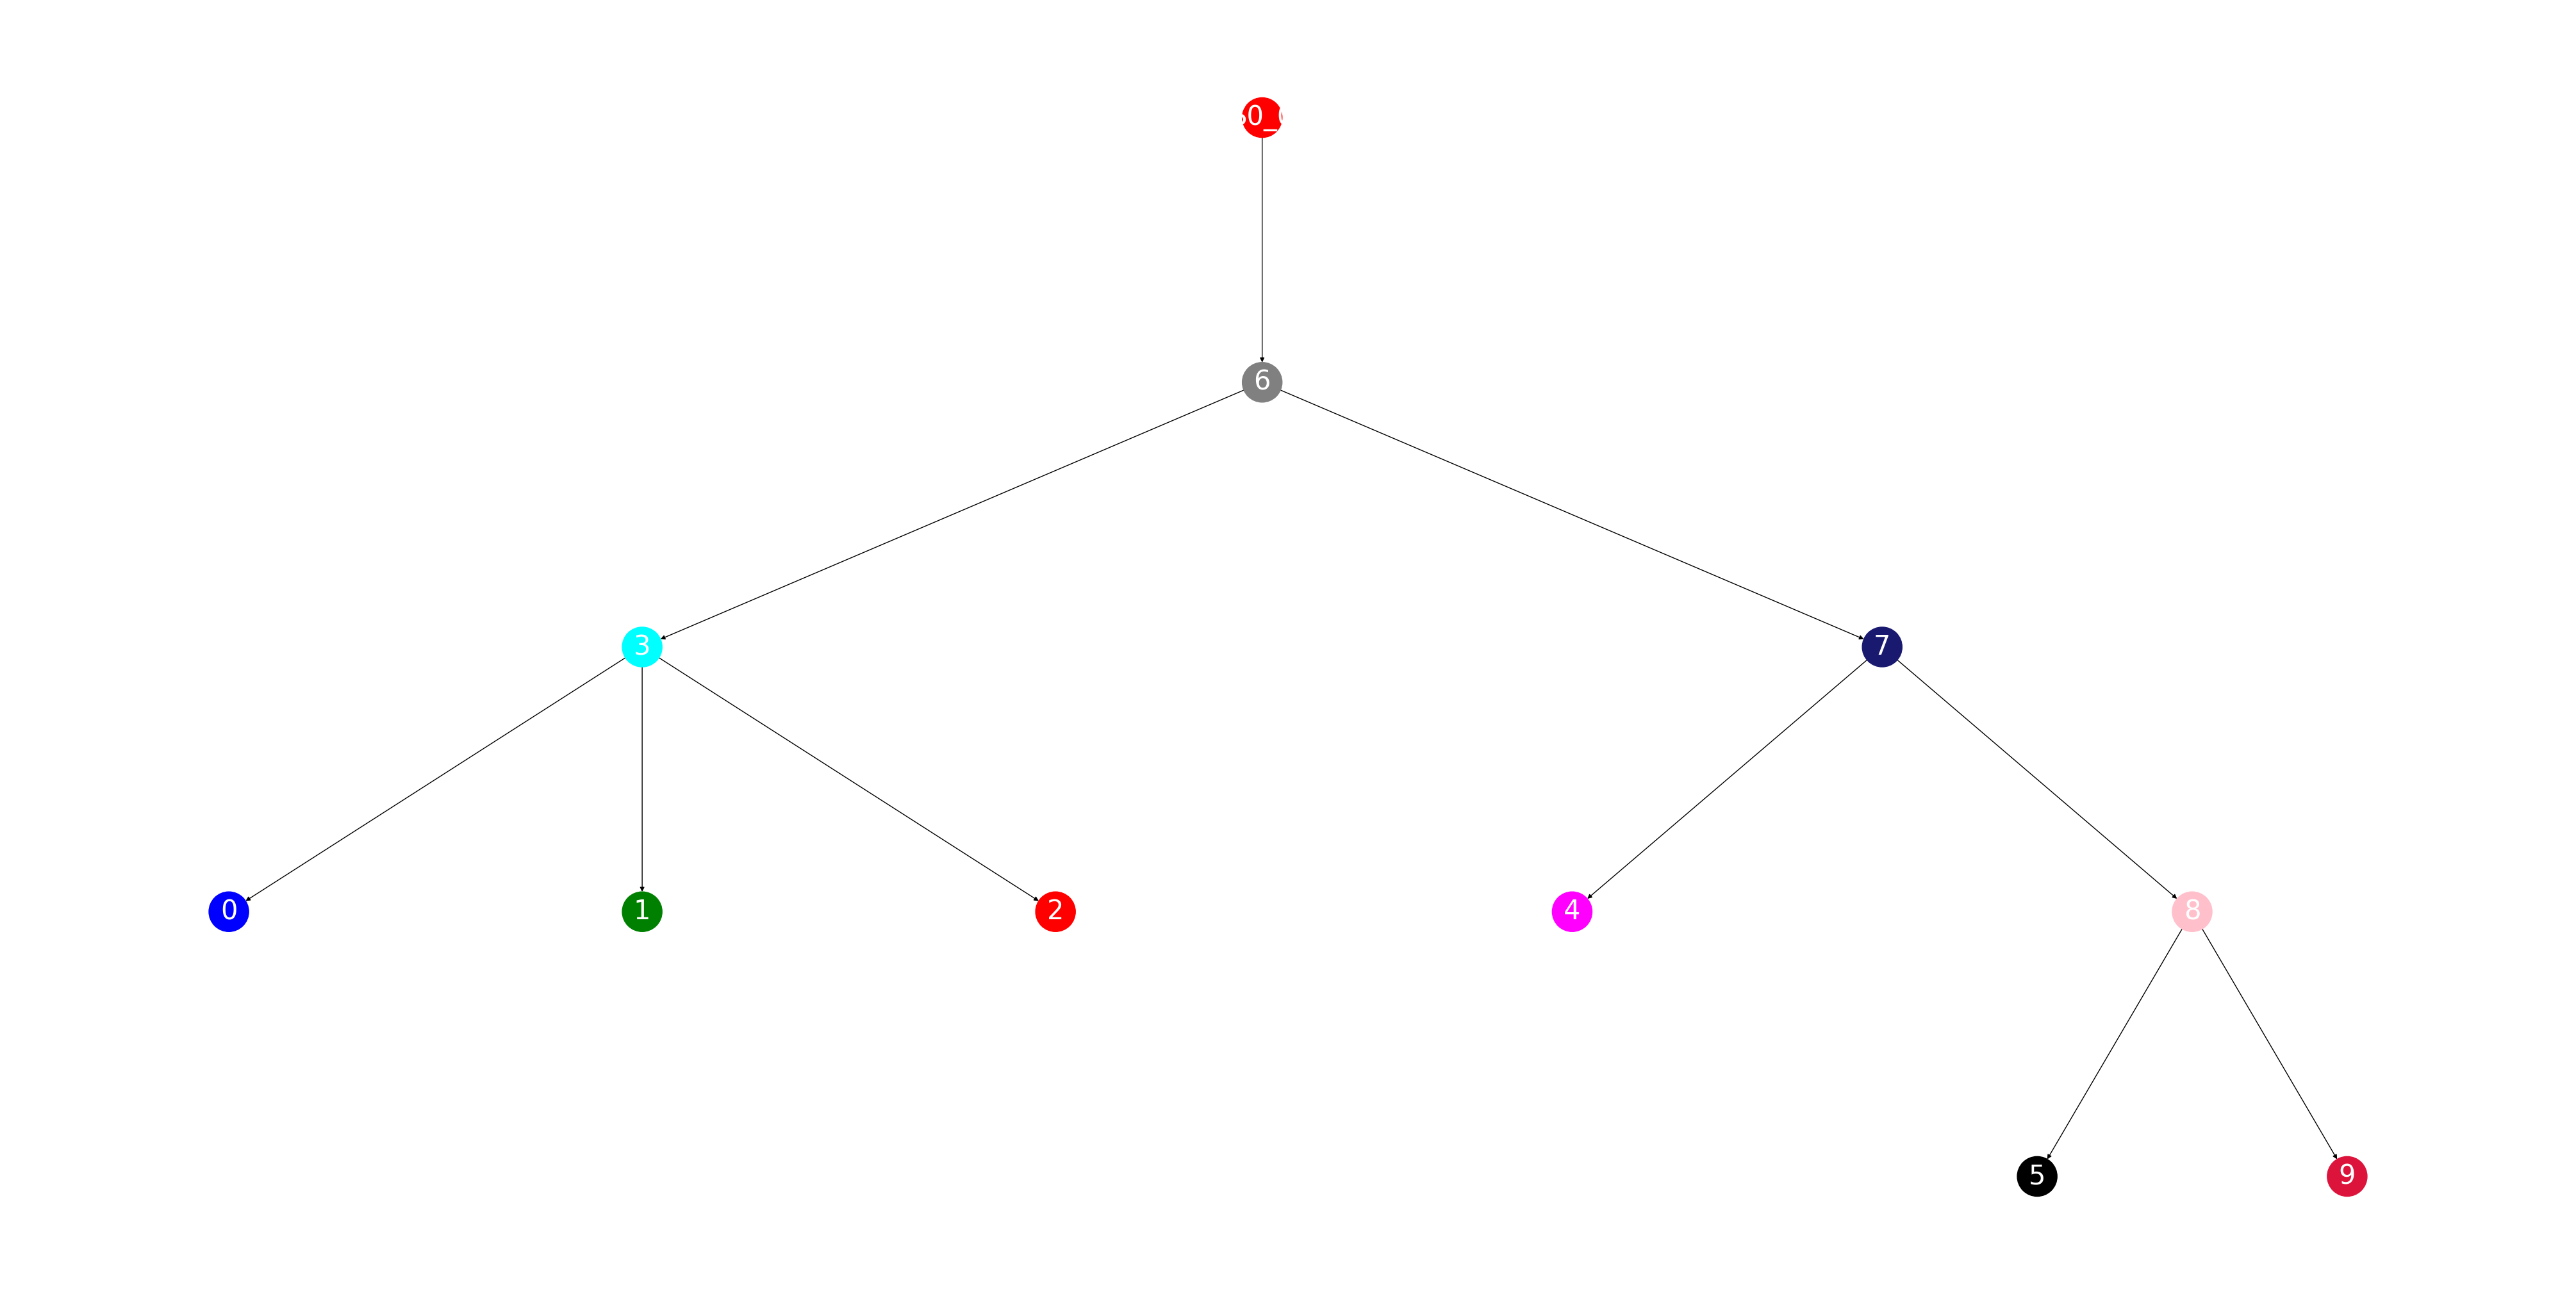

In [25]:
nviz.plot_limb_idx(
    neuron_obj,
    0,
    
)

In [26]:
nviz.plot_axon(neuron_obj)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Branch Attributes

In [27]:
"""
Can access the branches of a neuron like a nested list within the 
limb objects

#list like indexing
branch_obj = neuron_obj[2][0]

#dictionary like indexing
limb_obj = neuron_obj["L2"][0]

"""

'\nCan access the branches of a neuron like a nested list within the \nlimb objects\n\n#list like indexing\nbranch_obj = neuron_obj[2][0]\n\n#dictionary like indexing\nlimb_obj = neuron_obj["L2"][0]\n\n'

In [28]:
limb_obj = neuron_obj[0]
branch_obj = limb_obj[5]

In [29]:
limb_obj.set_branches_endpoints_upstream_downstream_idx()

In [30]:
branch_obj.endpoint_downstream

array([1491216.77925298,  642119.08343627, 1068969.86108359])

In [31]:
[k for k in dir(branch_obj) if k[0] != "_"]

['area',
 'axon_compartment',
 'boutons',
 'boutons_cdfs',
 'boutons_volume',
 'calculate_endpoints',
 'compartment',
 'compute_boutons_volume',
 'compute_spines_volume',
 'endpoint_downstream',
 'endpoint_downstream_with_offset',
 'endpoint_downstream_x',
 'endpoint_downstream_y',
 'endpoint_downstream_z',
 'endpoint_upstream',
 'endpoint_upstream_with_offset',
 'endpoint_upstream_x',
 'endpoint_upstream_y',
 'endpoint_upstream_z',
 'endpoints',
 'endpoints_nodes',
 'endpoints_upstream_downstream_idx',
 'head_neck_shaft_idx',
 'labels',
 'mesh',
 'mesh_center',
 'mesh_center_x',
 'mesh_center_y',
 'mesh_center_z',
 'mesh_face_idx',
 'mesh_shaft',
 'mesh_shaft_idx',
 'mesh_volume',
 'min_dist_synapses_post_downstream',
 'min_dist_synapses_post_upstream',
 'min_dist_synapses_pre_downstream',
 'min_dist_synapses_pre_upstream',
 'n_boutons',
 'n_spines',
 'n_synapses',
 'n_synapses_head',
 'n_synapses_neck',
 'n_synapses_no_head',
 'n_synapses_post',
 'n_synapses_pre',
 'n_synapses_shaft'

## Branch Attributes: Plotting

In [32]:
nviz.plot_branch_spines(branch_obj)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Neuron Graph Lite

In [33]:
"""
The neuron object exported as a simple networkx DiGraph with 
all of the attributes of the graphes 
"""

'\nThe neuron object exported as a simple networkx DiGraph with \nall of the attributes of the graphes \n'

In [34]:
G_axon = neuron_obj.pipeline_products.cell_type_ax_dendr.neuron_graph_high_fid_axon
G_axon = neuron_obj.neuron_graph_high_fid_axon

G_proof = neuron_obj.pipeline_products.auto_proof.neuron_graph_after_proof
G_proof = neuron_obj.neuron_graph_after_proof

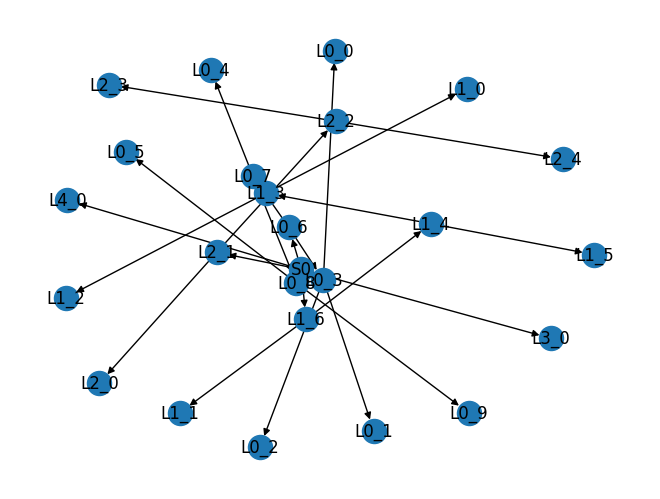

In [35]:
import networkx as nx
nx.draw(G_proof,with_labels = True)

## neuron_morphology_tools: Utility Library for Visualizing and Measuring Features of Neuron Lite objects

In [36]:
from neuron_morphology_tools import neuron_nx_utils as nxu

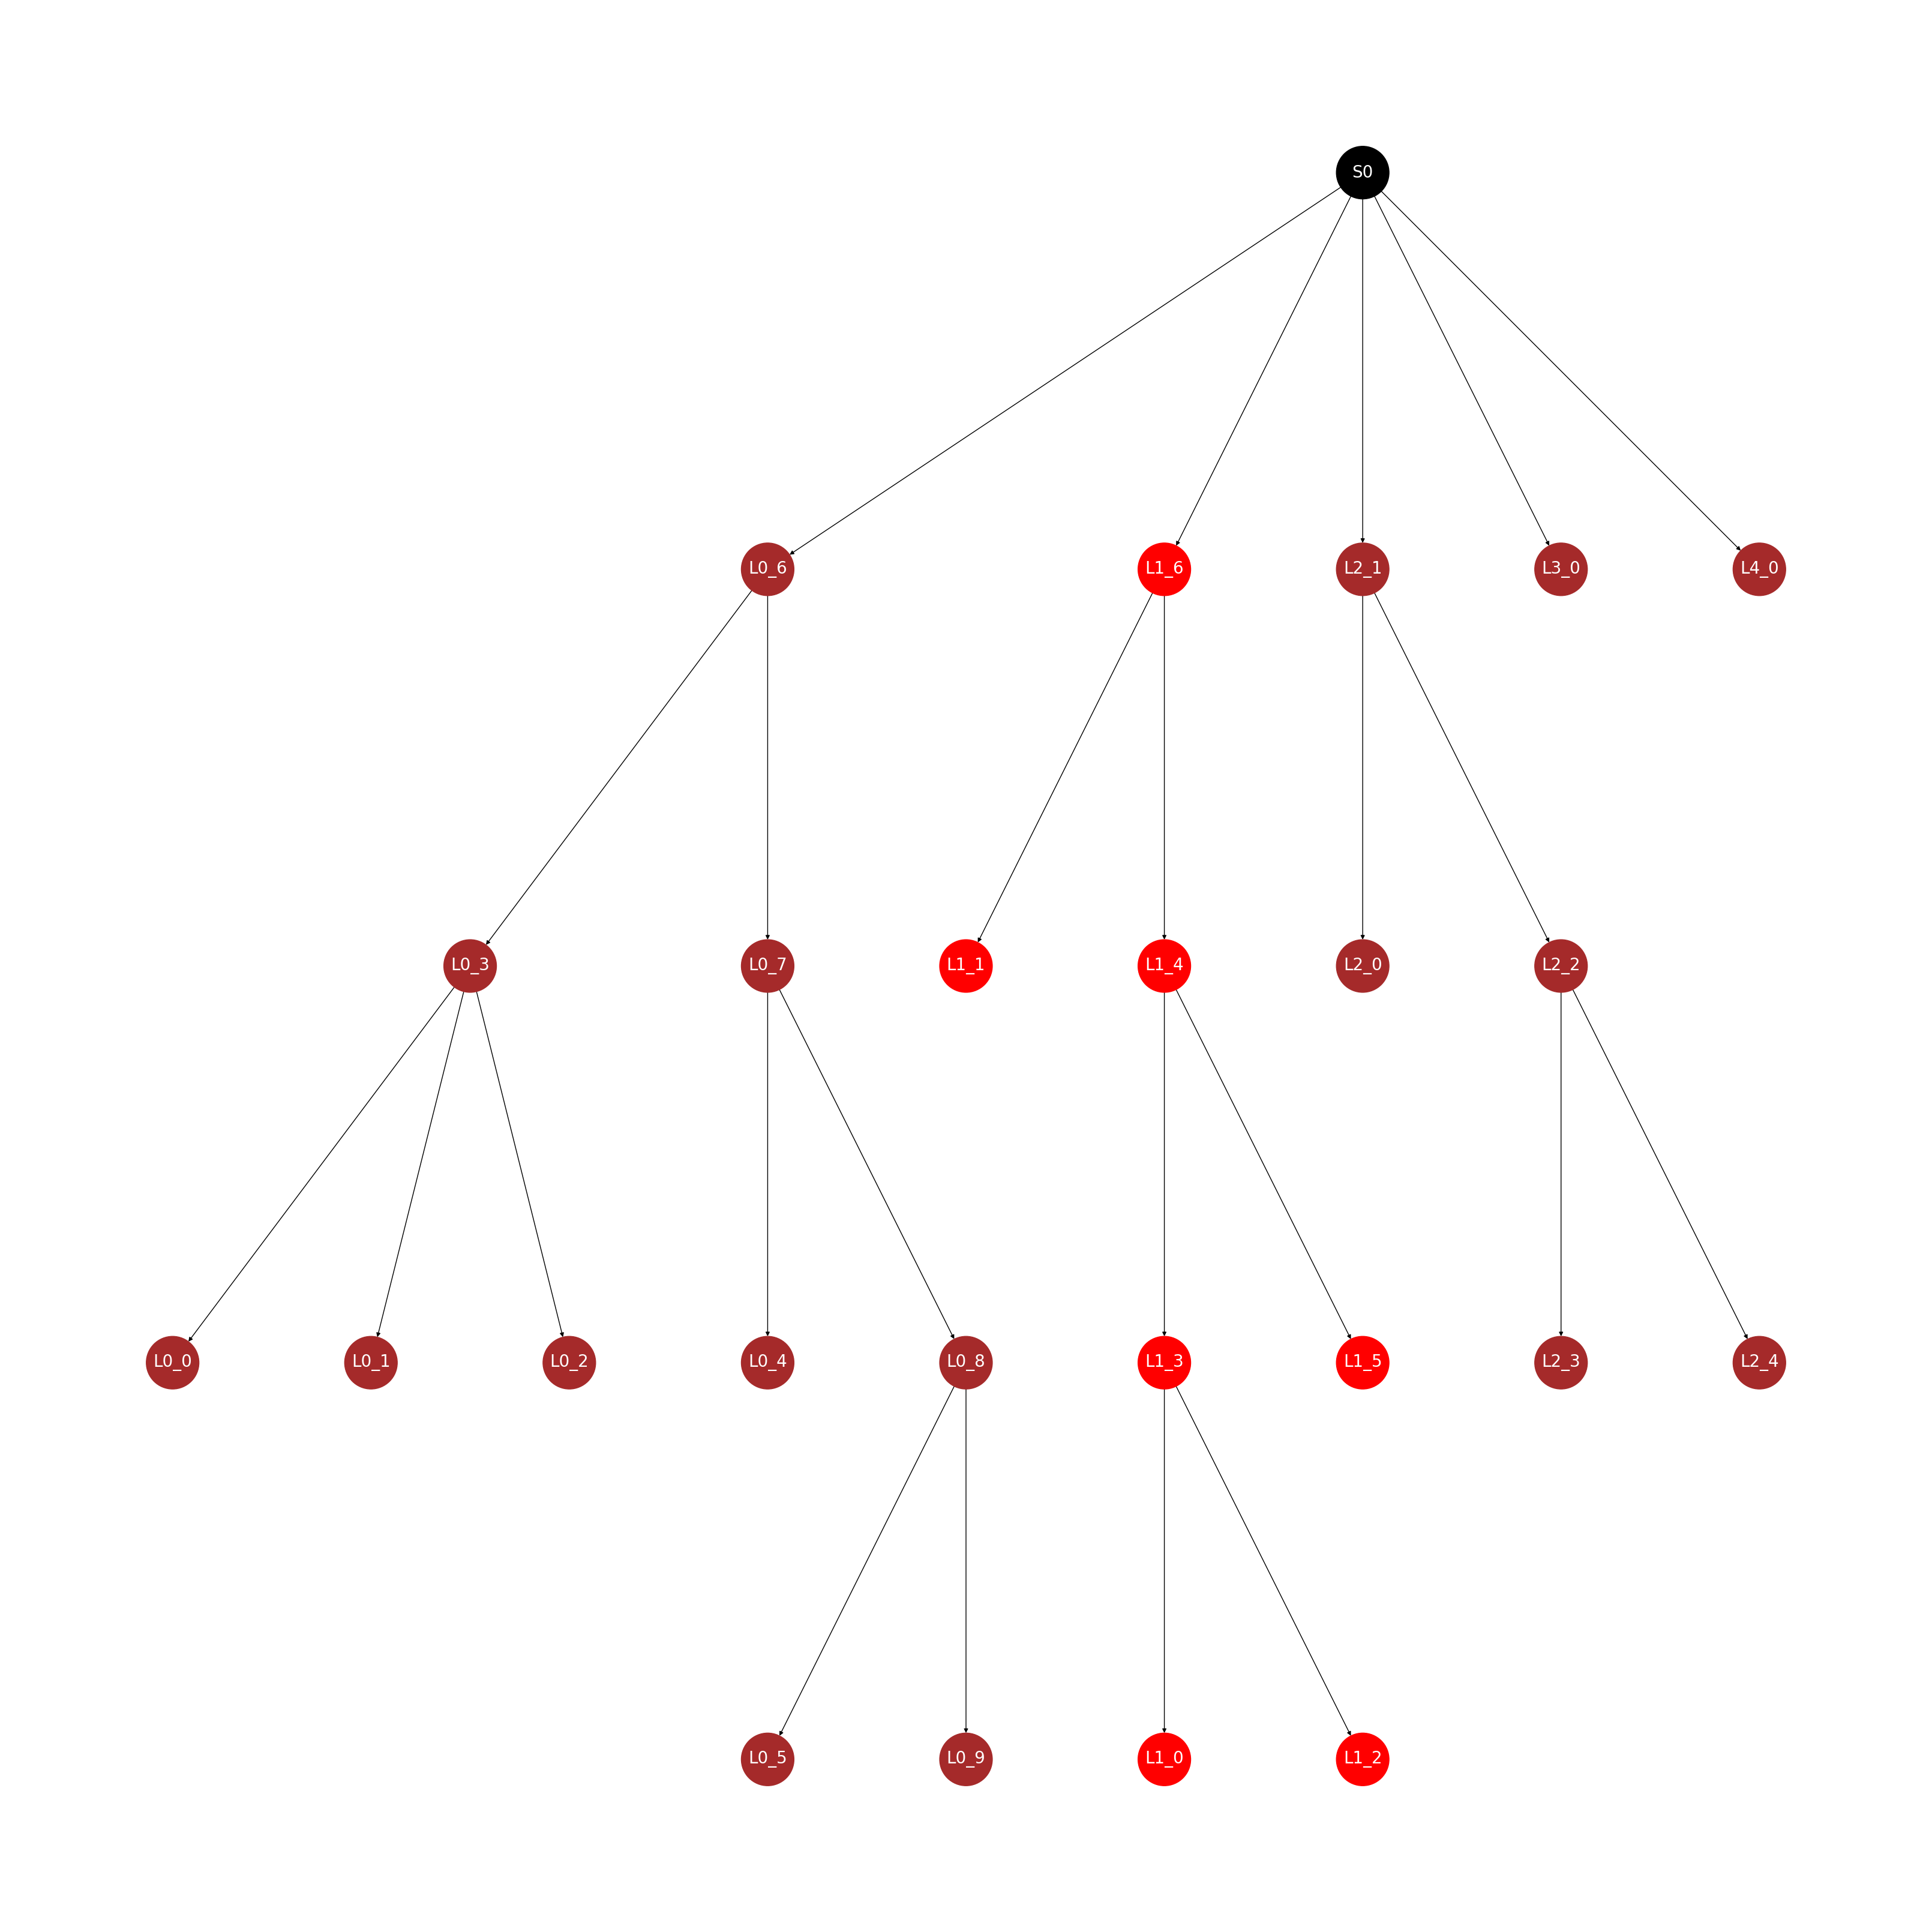

In [37]:
nxu.draw_tree(G_proof)

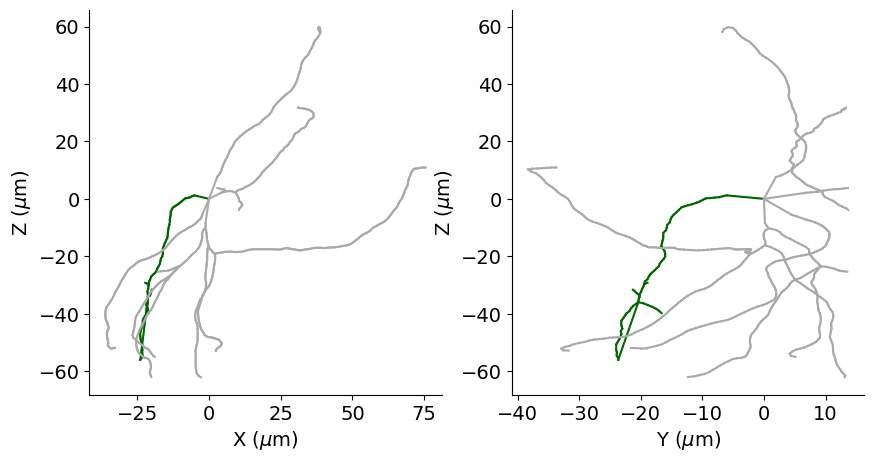

In [38]:
nxu.plot(G_proof)

In [39]:
nxu.plot_all_skeleton_compartments(G_proof)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [40]:
# accessing node attributes
G_proof.nodes["L0_5"]

{'area': 127.19664721805219,
 'compartment': 'basal',
 'axon_compartment': 'dendrite',
 'boutons_cdfs': None,
 'boutons_volume': None,
 'labels': ['basal'],
 'mesh_center': array([1488556.44343066,  628858.75458485, 1083302.79972628]),
 'endpoint_upstream': array([1490810.,  608372., 1098520.]),
 'endpoint_downstream': array([1491216.77925298,  642119.08343627, 1068969.86108359]),
 'mesh_volume': 10.620473070166666,
 'n_boutons': 0,
 'n_spines': 23,
 'n_synapses': 46,
 'n_synapses_head': 19,
 'n_synapses_neck': 0,
 'n_synapses_no_head': 6,
 'n_synapses_post': 46,
 'n_synapses_pre': 0,
 'n_synapses_shaft': 21,
 'n_synapses_spine': 25,
 'skeletal_length': 52893.968990689486,
 'spine_density': 0.00043483218292899347,
 'spine_volume_density': 42375.188095537065,
 'spine_volume_median': 87779917.12500095,
 'synapse_density': 0.0008696643658579869,
 'synapse_density_post': 0.0008696643658579869,
 'synapse_density_pre': 0.0,
 'total_spine_volume': 2241391885.099972,
 'width': 307.749713769425

# Neuron Lite: Exporting as SWC (so can interface with other analysis tools)

In [41]:
filename = nxu.export_swc_file(G_proof)
filename

'/NEURD/Applications/Tutorials/Neuron_Features/seg_864691135510518224_split_None_nucleus_None.swc'

### SWC Analysis: morphopy toolkit

In [42]:
from neuron_morphology_tools import morphopy_utils as mpu

In [43]:
N_tree_obj =mpu.ntree_obj_from_swc(filepath = filename)
N_tree_obj

In [44]:
from datasci_tools import pandas_utils as pu
stats_df = mpu.morphometrics(N_tree_obj)
stats_df

,normalized depth,axon branch points,axon width,axon depth,axon height,axon robust width,axon robust depth,axon robust height,axon x-bias,axon z-bias,...,"""apical"" width","""apical"" robust height","""apical"" robust width","""apical"" total length","""apical"" branch points",Log1p fraction of axon above dendrite,Log1p fraction of axon below dendrite,Log1p fraction of dendrite above axon,Log1p fraction of dendrite below axon,EMD axon dendrite
0,0.1,3,24.053081,57.242278,23.990234,18.027878,54.901785,17.19628,24.053081,-23.990234,...,95.690175,46.610406,77.078759,349.053287,4,0.0,0.0,0.475557,0.0,0.782178


In [45]:
pu.df_to_dicts(stats_df)[0]

{'normalized depth': 0.1,
 'axon branch points': 3,
 'axon width': 24.05308134425641,
 'axon depth': 57.24227828773285,
 'axon height': 23.990233829308067,
 'axon robust width': 18.02787776371282,
 'axon robust depth': 54.901784986784975,
 'axon robust height': 17.196280185016462,
 'axon x-bias': 24.05308134425641,
 'axon z-bias': -23.990233829308067,
 'axon tips': 4,
 'axon total length': 108.23162517199293,
 'axon max path distance to soma': 97.87884691975842,
 'axon max branch order': 3,
 'axon max path angle': 107.45865066418799,
 'axon median path angle': 12.54295421463277,
 'axon max segment length': 49.392855248043325,
 'axon log max tortuosity': 0.17627992684442165,
 'axon log min tortuosity': 9.852511637502669e-05,
 'axon log median tortuosity': 0.027636522274918373,
 'axon max branch angle': 144.77217258714103,
 'axon min branch angle': 110.56271052962376,
 'axon mean branch angle': 127.6674415583824,
 'axon above soma': 0.0,
 'soma radius': 7.479533146044285,
 'mean initial 